Experimental dataset to create regression models of appliances energy use in a low energy building. LSTM RNN to predict usage.
	

In [1]:
from math import sqrt
from sklearn.cross_validation import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import load_model
from matplotlib import pyplot

/home/bhushan/anaconda3/envs/SmartOff/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# Start of helper functions

In [2]:
# Converting time series data to Supervised
def convertTimeSeriesToLSTM(inputData):
    DF = DataFrame(inputData)
    prepData = list()
    prepData.append(DF.shift(1))
    prepData.append(DF.shift(-1))
    lstmData = concat(prepData, axis= 1)
    # print(lstmData[:10])
    lstmData.dropna(inplace=True)
    # print(lstmData[:10])
    return lstmData

In [3]:
# End of helper functions

In [4]:
datasetFull = read_csv('./data/house5/channel_5TV.dat', sep=' ', names=['Date', 'Usage'])
dataset = datasetFull[:10000]
values = dataset.values

In [5]:
print(dataset)

            Date  Usage
0     1404059032     69
1     1404059038     69
2     1404059044     69
3     1404059050     69
4     1404059056     69
5     1404059062     68
6     1404059068     68
7     1404059074     69
8     1404059080     68
9     1404059086     68
10    1404059092     69
11    1404059099     69
12    1404059105     68
13    1404059111     68
14    1404059118     68
15    1404059124     69
16    1404059131     68
17    1404059137     70
18    1404059144     68
19    1404059150     69
20    1404059157     69
21    1404059163     68
22    1404059169     68
23    1404059175     68
24    1404059181     69
25    1404059187     69
26    1404059193     68
27    1404059199     68
28    1404059205     68
29    1404059211     68
...          ...    ...
9970  1404120890      0
9971  1404120896      0
9972  1404120902      1
9973  1404120908      0
9974  1404120914      0
9975  1404120921      0
9976  1404120927      0
9977  1404120933      0
9978  1404120939      0
9979  1404120945

In [7]:
# Normalizing features
#scaler = MinMaxScaler(feature_range=(0,1))
#scaled = scaler.fit_transform(values)

In [6]:
lstmData = convertTimeSeriesToLSTM(values)

In [7]:
values = lstmData.values
print(values[:,1])
print (lstmData)

[ 69.  69.  69. ...,   0.   0.   1.]
                 0     1             0     1
1     1.404059e+09  69.0  1.404059e+09  69.0
2     1.404059e+09  69.0  1.404059e+09  69.0
3     1.404059e+09  69.0  1.404059e+09  69.0
4     1.404059e+09  69.0  1.404059e+09  68.0
5     1.404059e+09  69.0  1.404059e+09  68.0
6     1.404059e+09  68.0  1.404059e+09  69.0
7     1.404059e+09  68.0  1.404059e+09  68.0
8     1.404059e+09  69.0  1.404059e+09  68.0
9     1.404059e+09  68.0  1.404059e+09  69.0
10    1.404059e+09  68.0  1.404059e+09  69.0
11    1.404059e+09  69.0  1.404059e+09  68.0
12    1.404059e+09  69.0  1.404059e+09  68.0
13    1.404059e+09  68.0  1.404059e+09  68.0
14    1.404059e+09  68.0  1.404059e+09  69.0
15    1.404059e+09  68.0  1.404059e+09  68.0
16    1.404059e+09  69.0  1.404059e+09  70.0
17    1.404059e+09  68.0  1.404059e+09  68.0
18    1.404059e+09  70.0  1.404059e+09  69.0
19    1.404059e+09  68.0  1.404059e+09  69.0
20    1.404059e+09  69.0  1.404059e+09  68.0
21    1.404059e+09

In [14]:
# Separate input and output data
values = lstmData.values
X = values[:,:1]
Y = values[:,1]

# Splitting data into train, validation adn test set
X_Train, X_Temp, Y_Train, Y_Temp = train_test_split(X, Y, test_size=0.4)
X_Valid, X_Test, Y_Valid, Y_Test = train_test_split(X_Temp, Y_Temp, test_size =0.2)

# Reshape input to be 3D for LSTM input[samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Valid = X_Valid.reshape((X_Valid.shape[0], 1, X_Valid.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [15]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(X_Train, Y_Train, epochs=5, batch_size=10, validation_data=(X_Valid, Y_Valid), verbose=2, shuffle=False)

Train on 1104303 samples, validate on 588961 samples
Epoch 1/5
288s - loss: 362.8246 - val_loss: 372.3305
Epoch 2/5


KeyboardInterrupt: 

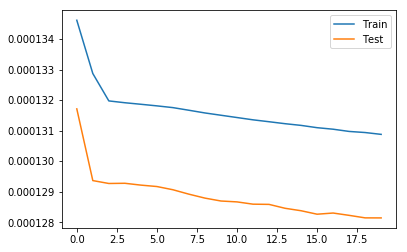

In [169]:
# plot history

pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

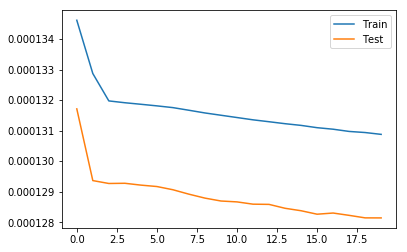

In [170]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [171]:
print(history)

print(Y_Test.shape, Y_Test.shape)

(147241,) (147241,)


In [172]:
prediction = model.predict(X_Test)
Y_Test = Y_Test.reshape(Y_Test.shape[0],-1)
print(prediction.shape)

(147241, 1)


In [173]:
Diff = Y_Test - prediction

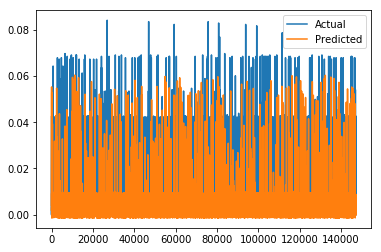

In [174]:
pyplot.plot(Y_Test, label='Actual')
pyplot.plot(prediction, label='Predicted')
pyplot.legend()
pyplot.show()

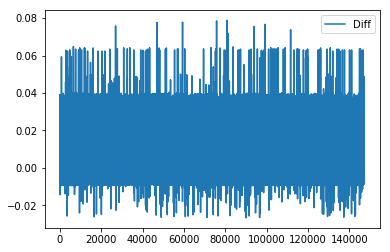

In [175]:
pyplot.plot(Diff, label='Diff')
pyplot.legend()
pyplot.show()

In [176]:
print(mean_squared_error(Y_Test, prediction))

0.000126843721533


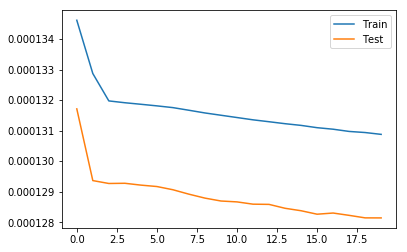

In [177]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [178]:
prediction = model.predict(X_Test)

In [179]:
Y_Test = Y_Test.reshape(Y_Test.shape[0],-1)

In [180]:
Diff = Y_Test - prediction

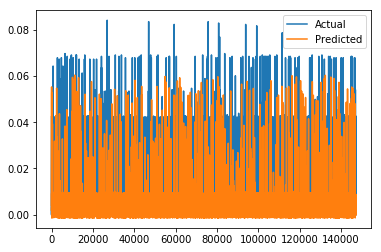

In [181]:
pyplot.plot(Y_Test, label='Actual')
pyplot.plot(prediction, label='Predicted')
pyplot.legend()
pyplot.show()

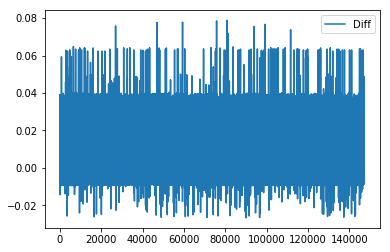

In [182]:
pyplot.plot(Diff, label='Diff')
pyplot.legend()
pyplot.show()

In [183]:
print(mean_squared_error(Y_Test, prediction))

0.000126843721533


In [184]:
print(Y_Test.shape)

(147241, 1)


In [185]:
print(X_Train.shape)

(1104303, 1, 1)


In [186]:
# Save model on system
model.save('full_data_h5_c5.h5')


In [189]:
model = load_model('full_data_h5_c5.h5')